In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




<h1 style="text-align:left;color:azure;background-color:blue"><br> Import CSV<br></h1>

In [16]:
df = pd.read_csv(r"D:/refugeeks_project/ml_py/my_df1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Klinikname           3032 non-null   object
 1   Gesamtzufriedenheit  3032 non-null   int64 
 2   Erfahrungsbericht    3032 non-null   object
dtypes: int64(1), object(2)
memory usage: 71.2+ KB


In [ ]:
#df["Datum"] = pd.to_datetime(df["Datum"])

Here are the steps we will take together:

Distribution Analysis: 

Combining Features:

Comparing Features with Target Variable: 

Building a Model: 

Improving and Deploying the Model:


<h2 style="font-family:tahoma">Distribution Analysis:</h2>

array([[<AxesSubplot:title={'center':'Gesamt_zfh'}>,
        <AxesSubplot:title={'center':'ist_zufrieden'}>],
       [<AxesSubplot:title={'center':'Polarity Level'}>, <AxesSubplot:>]],
      dtype=object)

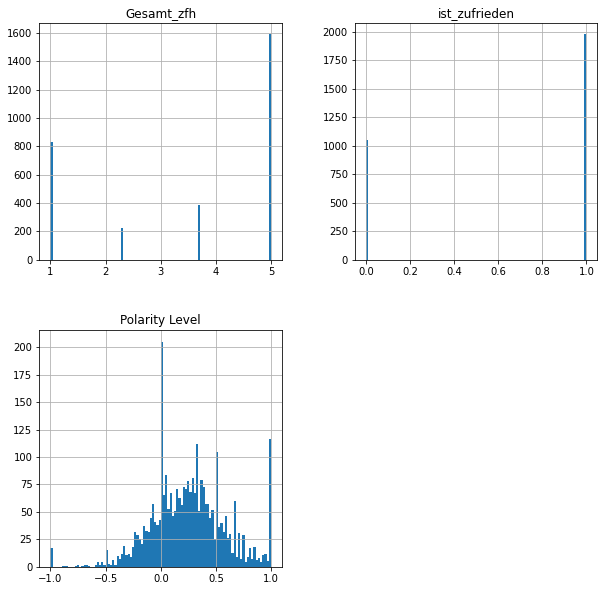

In [5]:
num_cols_df = df.select_dtypes(['int64','float64','datetime64[ns, UTC]'])
cat_cols_df = df.select_dtypes(['object'])
num_cols_df.hist(figsize = (10,10),bins=100)

In [18]:
df=df.sample(frac=1) # Shuffle

In [19]:
df.head()

,Klinikname,Gesamtzufriedenheit,Erfahrungsbericht
551,Psychiatrische Klinik Uelzen,6,ich war jan.2013 in der suchtstation .mein urt...
1851,Christliches Kinderhospital Osnabrück,6,Aufgrund verschiedener Erkrankungen waren wir ...
2355,Klinikum Wilhelmshaven gGmbH,4,Und wieder hatten wir eine tolle Entbindung im...
1007,Evangelisches Krankenhaus Oldenburg,6,Musste zwar sehr lange in der Unfallambulanz w...
2487,Klinikum Wilhelmshaven gGmbH,0,Hier möchte ich noch nicht mal Patient werden!...


In [21]:
from sklearn.model_selection import train_test_split

Independent_var = df.Erfahrungsbericht
Dependent_var = df.Gesamtzufriedenheit

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.15, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 2577
IV_test  : 455
DV_train : 2577
DV_test  : 455


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [23]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[125,  23,   7,   8],
       [  0,   0,   0,   0],
       [  0,   3,   5,   1],
       [ 16,   8,  37, 222]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.7736263736263737
Precision :  0.9173537130115504
Recall :  0.7736263736263737


c:\users\nowti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
example = ['Sehr gutes Konzept. Gruppentherapie, Einzeltherapie, Musiktherapie, Tanztherapie, diverse Entspannungstherapien. Dazu Fitnessraum, Krankengymnastik, Ergotherapie uvm. Dreierlei Menüs zu Mittag, Zimmer funktional eingerichtet, ansprechende Freizeitangebote. Direkt am See gelegen, lädt zu meditativen Spaziergängen ein. Ärzte und Therapeuten sehr zugewandt, Personal immer sehr hilfsbereit. Ich würde immer wieder dort hin fahren.  Einziges Manko: Begleitkinder sind zwar in Schule oder Betreuung, Eltern sollten sich aber im Klaren sein, dass die Bespaßung und Aufsicht bei ihnen und nicht bei der Klinik liegt. Am See gibt es einen großen Abenteuerspielplatz, die Klinik bietet freies Schwimmen nach dem Abendessen an und Sport und Spiel in der Turnhalle.  WLAN nur im Foyer gegen Bezahlung, TV gegen Gebühr.']
result = model.predict(example)

print(result)

[6]


In [26]:
df['Gesamtzufriedenheit'].value_counts()

6    1591
0     827
4     388
2     226
Name: Gesamtzufriedenheit, dtype: int64

In [28]:
df.groupby(by=["Klinikname","Gesamtzufriedenheit"]).count().head(25)

Erfahrungsbericht
Klinikname                            Gesamtzufriedenheit                   
AMEOS Klinikum Osnabrück              0                                   61
                                      2                                   15
                                      4                                    7
                                      6                                   24
Aller-Weser-Klinik - Klinik Achim     0                                    6
                                      2                                    2
                                      4                                    7
                                      6                                   17
Aller-Weser-Klinik - Klinik Verden    0                                   26
                                      2                                    9
                                      4                                   42
                                      6                                  100
Ammerland-Klinik                      0                                   50
                                      2                                    9
                                      4                                   11
                                      6                                   94
Bundeswehrkrankenhaus Westerstede     0                                   10
                                      2                                    5
                                      4                                    3
                                      6                                   35
Christliches Kinderhospital Osnabrück 0                                   17
                                      2                                    3
                                      4                                    3
                                      6                                   13
Evangelisches Krankenhaus Oldenburg   0                                   47

array([<AxesSubplot:xlabel='Klinikname'>], dtype=object)

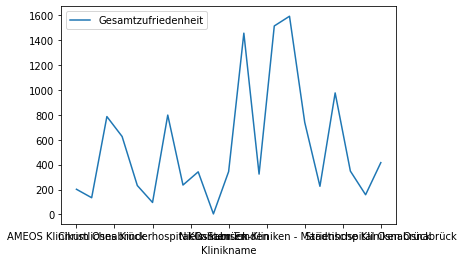

In [32]:
df.groupby(['Klinikname']).sum().plot(kind='line', subplots=True)

Klinikname                             Gesamtzufriedenheit
AMEOS Klinikum Osnabrück               0                      57.01
                                       6                      22.43
                                       2                      14.02
                                       4                       6.54
Aller-Weser-Klinik - Klinik Achim      6                      53.12
                                       4                      21.88
                                       0                      18.75
                                       2                       6.25
Aller-Weser-Klinik - Klinik Verden     6                      56.50
                                       4                      23.73
                                       0                      14.69
                                       2                       5.08
Ammerland-Klinik                       6                      57.32
                                       0                 

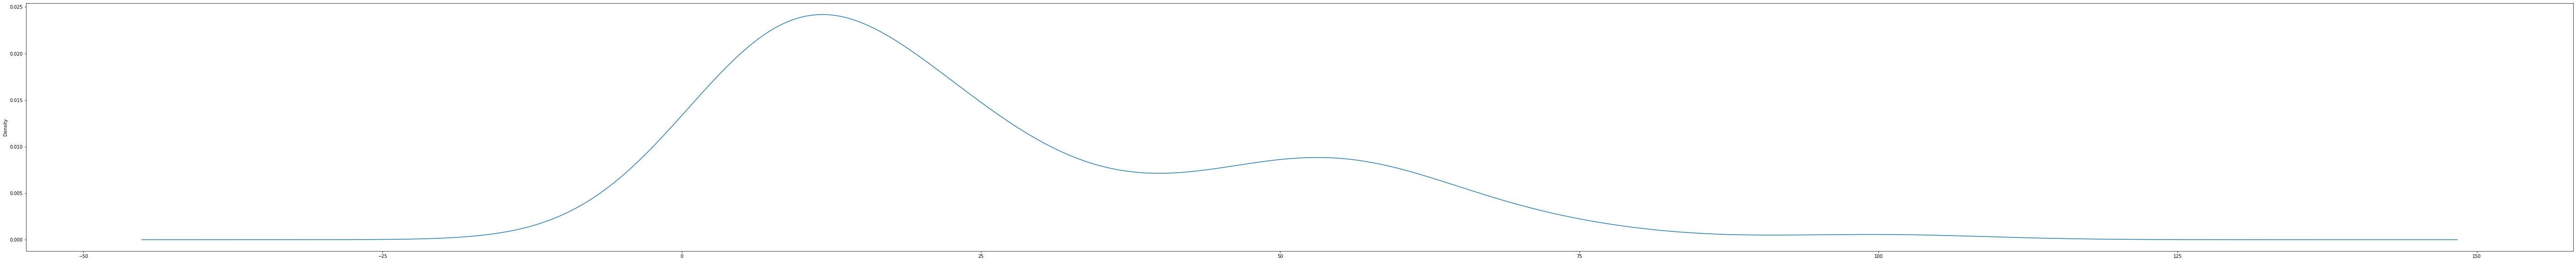

In [40]:
print(round(df.groupby('Klinikname').Gesamtzufriedenheit.value_counts(normalize=True)*100,2).head(25))
round(df.groupby('Klinikname').Gesamtzufriedenheit.value_counts(normalize=True)*100,2).plot(kind='density',figsize=(100,10))
plt.show()